# Study Player profile information

This notebook looks at the player game information on a per game level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("player_info_200k.csv",dtype={'steamid': str}).drop("Unnamed: 0", axis='columns')

/anaconda2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
api_calls_day = pd.Timestamp('2019-06-13')
churn_cutoff = api_calls_day - pd.Timedelta(3,'M')

In [4]:
df.head()

,avatar,avatarfull,avatarmedium,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,...,profilestate,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid
0,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.448199e+09,NaN,NaN,NaN,nuGAME,...,1.0,https://steamcommunity.com/id/nuGAME/,NaN,76561198199710782,1.433417e+09,NaN,NaN,NaN,NaN,NaN
1,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,...,1.0,https://steamcommunity.com/id/suudio/,Wil,76561198049785932,1.317413e+09,NaN,NaN,NaN,NaN,NaN
2,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.560634e+09,NaN,NaN,NaN,Ganzu,...,1.0,https://steamcommunity.com/id/iganzu/,NaN,76561198040753116,1.303060e+09,NaN,NaN,NaN,NaN,NaN
3,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,...,1.0,https://steamcommunity.com/id/mjontrix/,Not Gabe,76561197990995276,1.183517e+09,NaN,NaN,NaN,NaN,NaN
4,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,...,1.0,https://steamcommunity.com/profiles/7656119802...,Sergey,76561198025888135,1.274793e+09,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,avatar,avatarfull,avatarmedium,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,...,profilestate,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid
199874,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.561575e+09,NaN,GB,84,Grant666uk,...,1.0,https://steamcommunity.com/id/Grant666uk/,Grant Henderson,76561197960550818,1.063499e+09,NaN,,NaN,NaN,NaN
199875,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,2.0,1.559649e+09,NaN,NaN,NaN,rxing,...,1.0,https://steamcommunity.com/profiles/7656119796...,NaN,76561197960278912,NaN,NaN,,NaN,NaN,NaN
199876,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560877e+09,14063.0,DK,09,^1(Ak)^4 Allan Vester DK,...,1.0,https://steamcommunity.com/id/AllanVester/,Allan Vester,76561198014335152,1.254923e+09,NaN,,NaN,NaN,NaN
199877,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.561541e+09,NaN,US,NaN,Wonder,...,1.0,https://steamcommunity.com/profiles/7656119830...,Deniz,76561198303166180,1.462543e+09,NaN,,NaN,NaN,NaN
199878,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.519147e+09,NaN,RU,29,FSM-,...,1.0,https://steamcommunity.com/id/FSM0/,NaN,76561198084135026,1.361084e+09,NaN,,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199879 entries, 0 to 199878
Data columns (total 23 columns):
avatar                      199878 non-null object
avatarfull                  199878 non-null object
avatarmedium                199878 non-null object
commentpermission           100342 non-null float64
communityvisibilitystate    199878 non-null float64
lastlogoff                  199711 non-null float64
loccityid                   47627 non-null float64
loccountrycode              133280 non-null object
locstatecode                81830 non-null object
personaname                 199866 non-null object
personastate                199878 non-null float64
personastateflags           177339 non-null float64
primaryclanid               177339 non-null float64
profilestate                199034 non-null float64
profileurl                  199878 non-null object
realname                    112760 non-null object
steamid                     199878 non-null object
timecreated     

In [8]:
list(df['avatar'].mode())

['https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/fe/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb.jpg']

In [9]:
df['costom_avatar'] = df['avatar'].map(lambda x: (x != 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/fe/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb.jpg')*1)

In [10]:
df.head()

,avatar,avatarfull,avatarmedium,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,...,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar
0,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.448199e+09,NaN,NaN,NaN,nuGAME,...,https://steamcommunity.com/id/nuGAME/,NaN,76561198199710782,1.433417e+09,NaN,NaN,NaN,NaN,NaN,1
1,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,...,https://steamcommunity.com/id/suudio/,Wil,76561198049785932,1.317413e+09,NaN,NaN,NaN,NaN,NaN,1
2,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.560634e+09,NaN,NaN,NaN,Ganzu,...,https://steamcommunity.com/id/iganzu/,NaN,76561198040753116,1.303060e+09,NaN,NaN,NaN,NaN,NaN,1
3,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,NaN,3.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,...,https://steamcommunity.com/id/mjontrix/,Not Gabe,76561197990995276,1.183517e+09,NaN,NaN,NaN,NaN,NaN,1
4,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,1.0,3.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,...,https://steamcommunity.com/profiles/7656119802...,Sergey,76561198025888135,1.274793e+09,NaN,NaN,NaN,NaN,NaN,1


In [11]:
df = df.drop(['avatar','avatarfull','avatarmedium'],axis='columns')

In [12]:
#df['commentpermission'] = df['commentpermission'].fillna(0)

In [13]:
df.head()

,commentpermission,communityvisibilitystate,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,personastate,personastateflags,primaryclanid,...,profileurl,realname,steamid,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar
0,NaN,3.0,1.448199e+09,NaN,NaN,NaN,nuGAME,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/nuGAME/,NaN,76561198199710782,1.433417e+09,NaN,NaN,NaN,NaN,NaN,1
1,1.0,3.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/suudio/,Wil,76561198049785932,1.317413e+09,NaN,NaN,NaN,NaN,NaN,1
2,NaN,3.0,1.560634e+09,NaN,NaN,NaN,Ganzu,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/iganzu/,NaN,76561198040753116,1.303060e+09,NaN,NaN,NaN,NaN,NaN,1
3,NaN,3.0,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/id/mjontrix/,Not Gabe,76561197990995276,1.183517e+09,NaN,NaN,NaN,NaN,NaN,1
4,1.0,3.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,0.0,0.0,1.035828e+17,...,https://steamcommunity.com/profiles/7656119802...,Sergey,76561198025888135,1.274793e+09,NaN,NaN,NaN,NaN,NaN,1


In [14]:
df['isPublic'] = df['communityvisibilitystate'].map(lambda x: (x == 3)*1)
df['isFriendsOnly'] = df['communityvisibilitystate'].map(lambda x: (x == 2)*1)
df['isPrivate'] = df['communityvisibilitystate'].map(lambda x: (x == 1)*1)

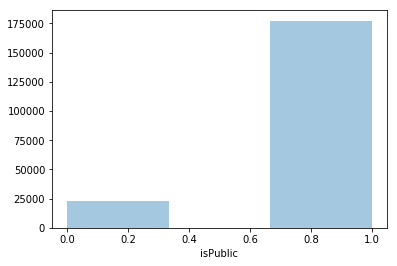

In [15]:
sns.distplot(df['isPublic'],kde=False,bins=3)

In [16]:
df = df.drop('communityvisibilitystate',axis='columns')

In [17]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,personastate,personastateflags,primaryclanid,profilestate,...,timecreated,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar,isPublic,isFriendsOnly,isPrivate
0,NaN,1.448199e+09,NaN,NaN,NaN,nuGAME,0.0,0.0,1.035828e+17,1.0,...,1.433417e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,0.0,0.0,1.035828e+17,1.0,...,1.317413e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
2,NaN,1.560634e+09,NaN,NaN,NaN,Ganzu,0.0,0.0,1.035828e+17,1.0,...,1.303060e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
3,NaN,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,0.0,0.0,1.035828e+17,1.0,...,1.183517e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,0.0,0.0,1.035828e+17,1.0,...,1.274793e+09,NaN,NaN,NaN,NaN,NaN,1,1,0,0


In [18]:
df['lastlogoff_readable'] = pd.to_datetime(df['lastlogoff'], unit='s')

In [19]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,personastate,personastateflags,primaryclanid,profilestate,...,gameextrainfo,gameid,gameserverip,gameserversteamid,lobbysteamid,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable
0,NaN,1.448199e+09,NaN,NaN,NaN,nuGAME,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2015-11-22 13:30:39
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-06-15 00:54:44
2,NaN,1.560634e+09,NaN,NaN,NaN,Ganzu,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-06-15 21:34:34
3,NaN,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-04-13 03:34:06
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,0.0,0.0,1.035828e+17,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,2019-06-14 21:03:18


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199879 entries, 0 to 199878
Data columns (total 24 columns):
commentpermission      100342 non-null float64
lastlogoff             199711 non-null float64
loccityid              47627 non-null float64
loccountrycode         133280 non-null object
locstatecode           81830 non-null object
personaname            199866 non-null object
personastate           199878 non-null float64
personastateflags      177339 non-null float64
primaryclanid          177339 non-null float64
profilestate           199034 non-null float64
profileurl             199878 non-null object
realname               112760 non-null object
steamid                199878 non-null object
timecreated            177339 non-null float64
gameextrainfo          4671 non-null object
gameid                 39772 non-null object
gameserverip           505 non-null object
gameserversteamid      506 non-null float64
lobbysteamid           427 non-null float64
costom_avatar      

In [21]:
df = df.drop(['personastate','personastateflags','profileurl','gameextrainfo','gameid','gameserverip','gameserversteamid','lobbysteamid'],axis='columns')

In [22]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,primaryclanid,profilestate,realname,steamid,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable
0,NaN,1.448199e+09,NaN,NaN,NaN,nuGAME,1.035828e+17,1.0,NaN,76561198199710782,1.433417e+09,1,1,0,0,2015-11-22 13:30:39
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,1.035828e+17,1.0,Wil,76561198049785932,1.317413e+09,1,1,0,0,2019-06-15 00:54:44
2,NaN,1.560634e+09,NaN,NaN,NaN,Ganzu,1.035828e+17,1.0,NaN,76561198040753116,1.303060e+09,1,1,0,0,2019-06-15 21:34:34
3,NaN,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,1.035828e+17,1.0,Not Gabe,76561197990995276,1.183517e+09,1,1,0,0,2019-04-13 03:34:06
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,1.035828e+17,1.0,Sergey,76561198025888135,1.274793e+09,1,1,0,0,2019-06-14 21:03:18


In [23]:
df['timecreated_readable'] = pd.to_datetime(df['timecreated'], unit='s')

In [24]:
df = df[pd.to_datetime(df['timecreated'], unit='s') < churn_cutoff]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177203 entries, 0 to 199878
Data columns (total 17 columns):
commentpermission       91987 non-null float64
lastlogoff              177058 non-null float64
loccityid               47596 non-null float64
loccountrycode          133204 non-null object
locstatecode            81788 non-null object
personaname             177194 non-null object
primaryclanid           177203 non-null float64
profilestate            176380 non-null float64
realname                112688 non-null object
steamid                 177203 non-null object
timecreated             177203 non-null float64
costom_avatar           177203 non-null int64
isPublic                177203 non-null int64
isFriendsOnly           177203 non-null int64
isPrivate               177203 non-null int64
lastlogoff_readable     177058 non-null datetime64[ns]
timecreated_readable    177203 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(4), object(5)
memory usage: 24

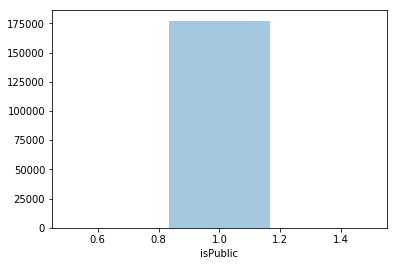

In [26]:
sns.distplot(df['isPublic'],kde=False,bins=3)

In [27]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,primaryclanid,profilestate,realname,steamid,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable,timecreated_readable
0,NaN,1.448199e+09,NaN,NaN,NaN,nuGAME,1.035828e+17,1.0,NaN,76561198199710782,1.433417e+09,1,1,0,0,2015-11-22 13:30:39,2015-06-04 11:16:51
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,1.035828e+17,1.0,Wil,76561198049785932,1.317413e+09,1,1,0,0,2019-06-15 00:54:44,2011-09-30 20:03:45
2,NaN,1.560634e+09,NaN,NaN,NaN,Ganzu,1.035828e+17,1.0,NaN,76561198040753116,1.303060e+09,1,1,0,0,2019-06-15 21:34:34,2011-04-17 17:05:56
3,NaN,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,1.035828e+17,1.0,Not Gabe,76561197990995276,1.183517e+09,1,1,0,0,2019-04-13 03:34:06,2007-07-04 02:37:15
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,1.035828e+17,1.0,Sergey,76561198025888135,1.274793e+09,1,1,0,0,2019-06-14 21:03:18,2010-05-25 13:08:00


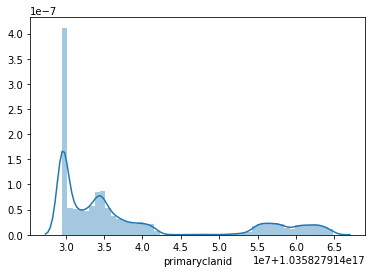

In [28]:
sns.distplot(df['primaryclanid'])

In [29]:
df['inClan'] = df['primaryclanid'].map(lambda x: 1 if x is not None else None)

In [30]:
df.head()

,commentpermission,lastlogoff,loccityid,loccountrycode,locstatecode,personaname,primaryclanid,profilestate,realname,steamid,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable,timecreated_readable,inClan
0,NaN,1.448199e+09,NaN,NaN,NaN,nuGAME,1.035828e+17,1.0,NaN,76561198199710782,1.433417e+09,1,1,0,0,2015-11-22 13:30:39,2015-06-04 11:16:51,1
1,1.0,1.560560e+09,NaN,GS,NaN,Suudioberglelemeistereehllu2K,1.035828e+17,1.0,Wil,76561198049785932,1.317413e+09,1,1,0,0,2019-06-15 00:54:44,2011-09-30 20:03:45,1
2,NaN,1.560634e+09,NaN,NaN,NaN,Ganzu,1.035828e+17,1.0,NaN,76561198040753116,1.303060e+09,1,1,0,0,2019-06-15 21:34:34,2011-04-17 17:05:56,1
3,NaN,1.555126e+09,NaN,NaN,NaN,Super Hot Fire,1.035828e+17,1.0,Not Gabe,76561197990995276,1.183517e+09,1,1,0,0,2019-04-13 03:34:06,2007-07-04 02:37:15,1
4,1.0,1.560546e+09,45738.0,UA,05,★ krichfal ★,1.035828e+17,1.0,Sergey,76561198025888135,1.274793e+09,1,1,0,0,2019-06-14 21:03:18,2010-05-25 13:08:00,1


In [31]:
df = df.drop('primaryclanid',axis='columns')

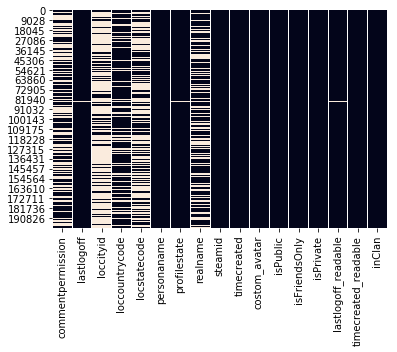

In [32]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.isnull(), cbar=False)

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/anaconda2/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


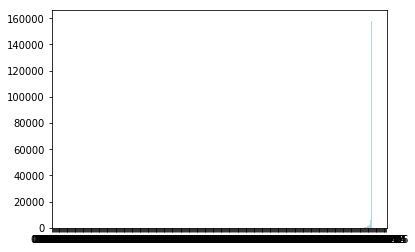

In [34]:
# plot it
fig, ax = plt.subplots(1,1)
ax.hist(df['lastlogoff_readable'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

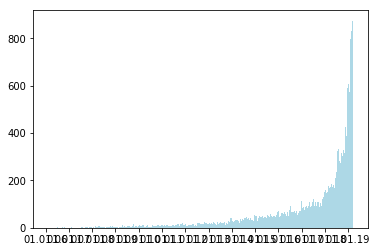

In [35]:
import datetime
# plot it
fig, ax = plt.subplots(1,1)
ax.hist(df[df['lastlogoff_readable'] < churn_cutoff]['lastlogoff_readable'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

In [36]:
df.to_csv('200k_clean_player_info.csv')

In [37]:
df['timecreated'].max()

1552442576.0

In [38]:
pd.to_datetime(df['timecreated'].max(),unit='s')

Timestamp('2019-03-13 02:02:56')

In [41]:
df.isPublic.nunique()

1